### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed and in the incongruent words condition, the words being displayed are color words whose names do not match the colors in which they are printed. 

The independent variable is Color Congruency.
The dependent variable is the time that it takes to name the ink colors in equally sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

a ) The main idea of this test is that we are using a sample in order to make inferences about the population, that is unknown, to find whether there is a difference between congruent and incongruent means in the population. 

Since we are comparing the results of population, hypothesis should be stated by means of population. Below you may find the hypothesis test in words and in mathematically stated. (μ: related population means.)


H0: There is no difference in population means of response time under incongruent and congruent scenarios, which can be mathematically represented as; H0: μCongruent = μIncongruent

H1: There is a difference in population means of response time under incongruent and congruent scenarios, which can be mathematically represented as; H1: μCongruent $\neq$ μIncongruent

b) You may find the detail analysis about the data frame below. 

There are 24 samples in our dataset. It is less than 30 values. Here we can calcuate the sample mean and sample standart deviation. "The t-test for dependent means is considered typically "robust" for violations of normal distribution.This means that the assumption can be violated without serious error being introduced into the test in most circumstance.
However, if we are conducting a one-tailed test and the data are highly skewed, this will cause a lot of error to be introduced into our calculation of difference scores which will bias the results of the test. In this circumstance, a nonparametric test should be used.*" I will use bootstrapping method to correspond the population parameter(μ) and then simulate the results to calculate the confidence interval and p values.

"for t-test: http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm *"

*Mentor note.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [47]:
# Perform the analysis here

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as se
import scipy.stats as stats

In [48]:
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [49]:
df = df.rename(columns = {"Congruent" : "Co", "Incongruent" : "Inco"})
df.head()

,Co,Inco
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [50]:
df.describe()

,Co,Inco
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [51]:
print("Co mean:", df.Co.mean())
print("Inco mean:", df.Inco.mean())

print("Co std dev:", df.Co.std())
print("Inco std dev:", df.Inco.std())

print("Co variance:", df.Co.var())
print("Inco variance:", df.Inco.var())

print("Co min:", df.Co.min(), "/", "Co max:", df.Co.max())
print("Inco min:", df.Inco.min(), "/", "Inco max:", df.Inco.max())

Co mean: 14.051125
Inco mean: 22.0159166667
Co std dev: 3.55935795765
Inco std dev: 4.79705712247
Co variance: 12.6690290707
Inco variance: 23.0117570362
Co min: 8.63 / Co max: 22.328
Inco min: 15.687 / Inco max: 35.255


**Descriptive statistics:** In this part the data is read as dataframe. For exploration the columns names were changed to ease of writing. You may find two different representation of mean, min, max and std. Mean, min and max values of Congruent data is lower than Incongruent data.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Response time in s')

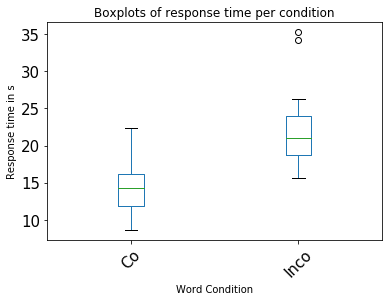

In [52]:
df.boxplot(grid=False, rot=45, fontsize=15)
plt.title("Boxplots of response time per condition")
plt.xlabel("Word Condition")
plt.ylabel("Response time in s")


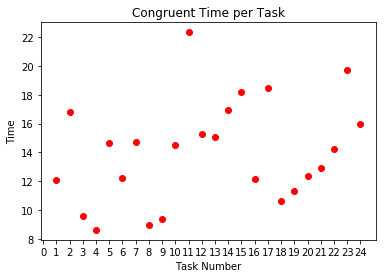

In [53]:
x = list(range(1, 25))


plt.scatter(x, df["Co"], color ="red")
plt.xticks(range(25))
plt.title("Congruent Time per Task")
plt.xlabel("Task Number")
plt.ylabel("Time");

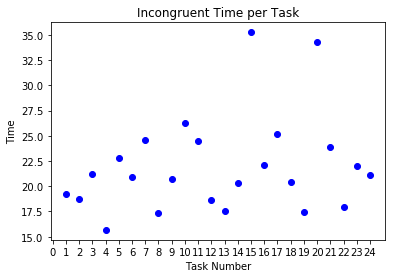

In [54]:
plt.scatter(x, df["Inco"], c = "blue")
plt.xticks(range(25))
plt.title("Incongruent Time per Task")
plt.xlabel("Task Number")
plt.ylabel("Time");

**Visualisation:** In this part, two visualisation were drawn to understand the data. The boxplot shows the mean values, Congruent's mean value is lower than Incongruent's mean value. Also, incongruent data have 2 outliers.

In the second part, distribution of data is analyased with scatter plots. Incongruent data are dense between 15 and 27.5 seconds while congruent data is scattered.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [55]:
# Perform the statistical test here

# Set columns to lists to use in ttest function
Co = df['Co'].values.tolist()
Inco = df['Inco'].values.tolist()

stats.ttest_ind(Co,Inco,equal_var = False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)

In [56]:
diffs = []

for i in range(1000):
    bootsample = df.sample(24, replace = True)
    mean_co = bootsample["Co"].mean()
    mean_Inco = bootsample["Inco"].mean()
    diffs.append(mean_Inco - mean_co)

np.percentile(diffs, 2.5), np.percentile(diffs,97.5)

(6.1080552083333348, 9.9870343750000004)

In [57]:
np.std(diffs)

1.0091249612241622

Here the confidence interval does not contain zero. Therefore this would suggest that there is a difference in population means. We reject the null hypothesis and say that the mean of the difference in time spent for Congruent and Incongruent words is statistically significant. Below, I calculate the p value:

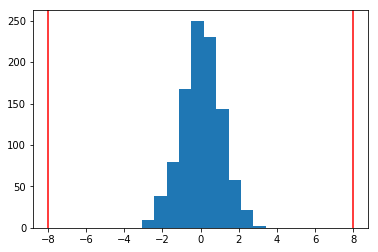

In [58]:
sample_dif = df["Inco"].mean() - df["Co"].mean()
diffs = np.array(diffs)

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 1000)
nullmean = 0

# Plot the null distribution

high = sample_dif
low = nullmean- sample_dif


plt.hist(null_vals)
plt.axvline(x = high, c='red')
plt.axvline(x = low, c='red')
plt.show()


In [59]:
# Compute p-value
(null_vals > sample_dif).mean() + (null_vals < (null_mean - sample_dif)).mean() 

0.0

**Result:**  

The aim of this project is using 24-sample size data wheter there is a statistical significant difference in populatiın parameter. 

First of all the hypothesis is stated. 

Descriptive analysis is made for the dataframe. 

Box plot and scatter plots are used for visualisation. 

Finally Bootstrapping method is used to understand the statistical significance between Congruent and Incongruent data. Since p value is ~0, there is a difference in population means of response time under incongruent and congruent scenarios. With this result we reject the null hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--